# Actividad 2

La solución de la ecuación 
$$\frac{\partial ^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=0$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(1,y)=0, \;\;\; 0<x<1$$
Y la condición inicial:
$$u(x,0)=100,\hspace{1cm} u(x,1)=200\;\;\;0<y<1$$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y)=\sum_{n=1}^{\infty} \left[\frac{-200[(-1)^{n}-1]}{n\pi}cosh(n\pi y)+\left(\frac{200[(-1)^{n}-1]}{n\pi}cosh(n\pi)-\frac{400[(-1)^{n}-1]}{n\pi}\right)\frac{senh(n\pi y)}{senh(n\pi)} \right]sen(n\pi x)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import *

Para empezar, graficamos la condición inicial. $$u(x,0)=100$$

In [3]:
def f(x):
  if (x<1 and x>0):
    return 100
  else:
    return 0

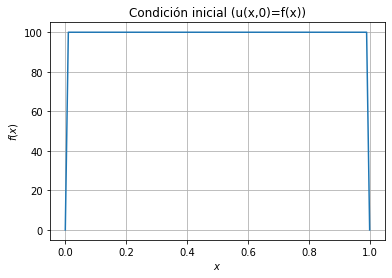

In [4]:
x = []
y = []
for k in range(101):
  x.append(0.01*k)
  y.append(f(0.01*k))

plt.plot(x,y,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
plt.grid()
plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=100$

In [5]:
def fourier(x,N): # N es el número de armónicos
    s = 0
    for n in range(1,N+1):
        s += (((-1)**n-1)/n)*sin(n*pi*x)
    return (-200/pi)*s

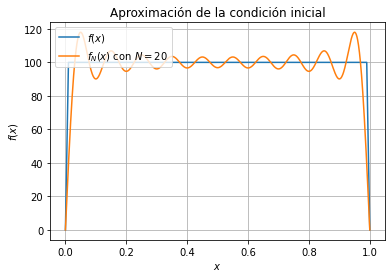

In [6]:
x1=[]
y1=[]
for i in range(1001):
  x1.append(0.001*i)
  y1.append(fourier(0.001*i,20))

plt.plot(x,y,label='$f(x)$')
plt.plot(x1,y1,label='$f_N(x)$ con $N=20$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

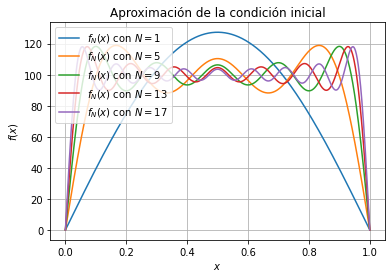

In [7]:
def Fourier(lista,N):
  l=[]
  for t in range(len(lista)):
    l.append(fourier(lista[t],N))
  return l

for i in range(1,20,4):
    plt.plot(x1,Fourier(x1,i),label='$f_N(x)$ con $N=%d$' %i)

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [22]:
# funcion u(x,0)  con 100 armonicos
def u(x,y):

  s = 0
  for n in range(1,101):
    s += ( -(200/pi)*( ((-1)**n-1)/n )*cosh(n*pi*y)*sin(n*pi*x) + (200/pi)*( ((-1)**n-1)/n )*(1/tanh(n*pi))*sinh(n*pi*y)*sin(n*pi*x) - (400/pi)*(((-1)**n-1)/n)*(1/sinh(n*pi))*sinh(n*pi*y)*sin(n*pi*x) )
  return s

y2=[]
for n2 in range(len(x1)):
  y2.append(u(x1[n2],0))


La función que se escribio en forma de codigo fue:
$$u(x,y)=-\frac{200}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n}-1}{n}cosh(n\pi y)sen(n\pi x)+\frac{200}{\pi}\sum_{n=1}^{\infty}\frac{(-1)^{n}-1}{n}\left( \frac{1}{tanh(n\pi)} \right)senh(n\pi y)sen(n\pi x)-\frac{400}{\pi}\sum_{n=1}^{\infty}\frac{(-1)^{n}-1}{n}\left( \frac{1}{senh(n\pi)} \right)senh(n\pi y)sen(n\pi x) $$

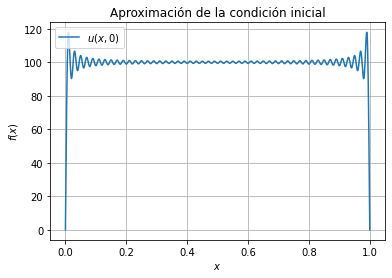

In [23]:
plt.plot(x1,y2,label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona.

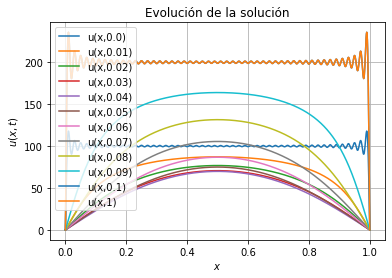

In [24]:
def u_n(lista,t):
  l=[]
  for n in range(len(lista)):
    l.append(u(lista[n],t))
  return l

for t2 in range(0,11):
  v=round(0.01*t2,2)
  plt.plot(x1,u_n(x1,0.1*t2), label='u(x,%r)'%v)

plt.plot(x1,u_n(x1,1), label='u(x,1)')

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Y podemos ver esto en una gráfica en 3D.

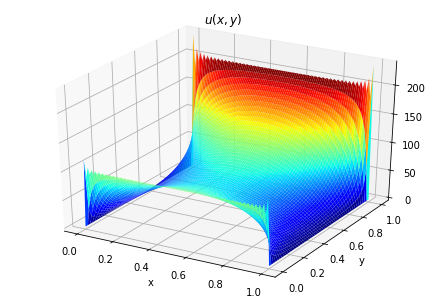

In [25]:
X=np.linspace(0,1,100)
Y=np.linspace(0,1)
X,Y=np.meshgrid(X,Y)

# función u(x,y)
def Z(x,t):
  m = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
      m[i][j]=u(x[i][j],t[i][j])
  return m

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z(X,Y), rstride=1, cstride=1, cmap=cm.jet)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$u(x,y)$')
plt.show()